In [1]:
from fonctions import *

In [2]:
# récupération des articles et des tags

dic = {}
with open("articlesTags.json", "r", encoding="utf-8") as fin:
    dic = json.load(fin)

new_dic = reorganiser_dico(dic)

In [3]:
# séparation des informations dans trois listes différentes

chemins_articles = [x for x in new_dic.keys()]

liste_tags = [x[1] for x in new_dic.values()]

liste_titres = [x[2] for x in new_dic.values()]

print(liste_tags[:3])
print(liste_titres[:3])

[['NNP', 'FW', 'FW', 'NNS', 'VBP', 'JJ', 'NN', 'IN', 'FW', 'JJ', 'FW', 'IN', 'CD'], ['NNP', 'NNS', 'VBP', 'NN', ':', 'IN', 'NNS', 'VBP', 'JJR', 'NN', 'NN', 'NN', 'JJ', 'NN'], ['NNP', 'FW', 'FW', '.', 'NNS', 'NNS', ':']]
['Identification de trois gènes expliquant la virulence de la grippe espagnole de 1918', 'Les chantiers du Président : On ne peut cacher le soleil avec un tamis', 'Gueule de bois ? Quelques remèdes...']


In [4]:
# Vectorisation des documents et création du model

X, V = creer_X(liste_tags)

model = creer_model_KM(4, X)

predictions = model.predict(X)

print(predictions[:100])
print(effectifs_clusters(model))

[1 0 1 1 3 3 1 3 0 0 2 1 1 3 1 0 0 1 3 1 0 0 1 1 1 1 1 0 0 0 0 0 3 1 0 1 3
 0 3 3 0 3 3 3 0 1 3 1 3 1 1 0 1 1 0 0 1 3 0 1 1 1 0 0 1 1 1 1 3 1 1 3 1 0
 1 1 0 3 0 1 0 1 1 3 3 0 1 1 1 3 3 1 1 1 3 3 3 1 3 3]
{1: 2643, 0: 1917, 3: 896, 2: 229}


In [10]:
# extraction de titres d'articles au hasard pour chaque cluster

dictionnaire = dic_complet(X, predictions, liste_tags, liste_titres)

afficher_titres_hasard(3, dictionnaire)

Cluster 0 : 1917 articles
(' LEglise du Burkina est très active et unie',)
('Rachat - Pfizer-Wyeth : méga fusion dans la pharmacie',)
('Parution du dernier numéro de la revue des sapeurs-pompiers avec un portrait de la première femme sapeur-pompier du Maroc',)
----------
Cluster 1 : 2643 articles
('La solution de lautocar',)
('Zimbabwe: Mugabe lance un ultimatum avant un nouveau sommet régional',)
('Un découvreur de trop',)
----------
Cluster 2 : 229 articles
('Un convoi pour Gaza le 18 janvier PARIS (AFP)  Le Congrès mondial des imams et rabbins pour la paix a annoncé hier organiser un convoi humanitaire qui apportera à Gaza 1.000 t de produits de première nécessité le 18 janvier.',)
("Une ONG israélienne publie des faire-part de décès denfants palestiniens Al Qods occupée (AFP)  L'un des plus importants organismes de défense des droits de l'Homme israéliens a publié hier une pleine page de faire-part de décès d'enfants palestiniens victimes de tirs israéliens, dans le quotidien Haare

In [6]:
# affichage des dimensions caractéristiques de chaque cluster

dimensions_clusters(model, V)

Cluster 0: NN NNP JJ FW NNS IN VBP VBZ CD DT
Cluster 1: NN NNP NNS FW JJ VBP VBZ IN CD CC
Cluster 2: NN NNP FW JJ NNS IN VBP VBZ CD DT
Cluster 3: NNP NN FW JJ NNS VBZ IN VBP CD VBD


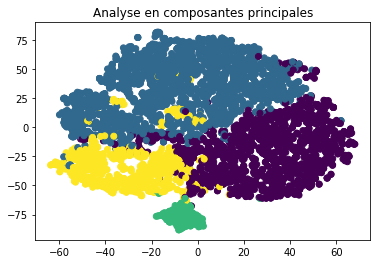

In [7]:
# Tracer l'analyse en composantes principales

tracer_ACP(X, predictions)

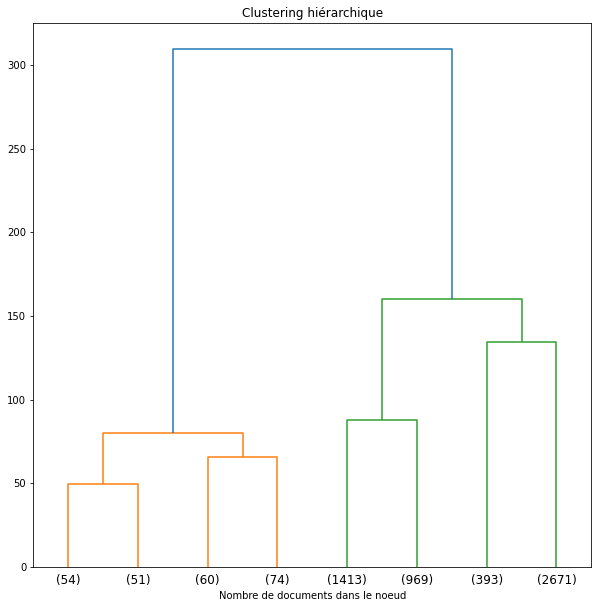

In [8]:
model = AgglomerativeClustering(n_clusters=4, compute_distances=True)
model = model.fit(X)
tracer_dendrogram(model)

In [9]:
print(effectifs_clusters(model))

{0: 2671, 3: 393, 2: 2382, 1: 239}
